# **Análise da correlação entre Juros básicos e inflação no Brasil ao longo do tempo**

## Interpretação dos Resultados Correlação no Brasil:
## - Brasil: Nos primeiros meses (0 a 3 ), as correlações variam em torno de valores baixos, geralmente negativos, com uma leve tendência positiva no mês 3.
##Mudança de Direção: no mês 7 tem-se uma correlação positiva significativa (0.067). Um desavisado poderia interpretar isso como se a Selic a pós algum tivesse um efeito completamente oposto ao que se propunha, mas ao que parece o efeito da Selic cai e outros fatores parecem serem mais importantes para decidirem para onde a inflação vai nesse período.
## Oscilações: A partir do 11° mês, as correlações passam a ser tornarem mais fortes. O pico de queda no caso brasileiro entre 2000 e 2024, ocorre no 18° mês.
## Tendência Geral no Caso braileiro: A correlação parece oscilar bastante, sugerindo que a relação entre inflação e taxa de juros é complexa e pode ser influenciada por vários fatores ao longo do tempo. O efeito esperado da Selic na inflação parece ocorrer mais a médio prazo na economia brasileira.

# Conclusão:
## - A política monetária não tende a ter efeito máximo no curtíssimo prazo. Ela tende a ter efeitos mais a médio-prazo (entre 6 a 20 meses)
## - A economia brasileira tem dificuldade de absorver a política monetária. Isso indica que a economia brasileira de fato parece ter uma baixa sensibilidade à política de juros. Esse problema pode decorrer de deficiências dos mecanismos de transmissão da política monetária, nessa economia.

# Insight:
## - Deve-se estudar mais os dados e combinar isso com a teoria econômica, de forma a se buscar quais os mecanismos de transmissão da política monetária que estão deficientes e como consertar isso.



---



## Caso dos EUA:
## Efeito claro e de acordo com esperado: A inflação começa a responder a um aumento da Taxa básica de juros nos EUA a partir do segundo mês e permanece assim durante um longo período.
## Pico: o pico de queda da inflação após um aumento da Selic parece ocorrer lá pelo 10° mês após o aumento da taxa básica. O efeito inverso da taxa básica de juros na inflação no caso dos EUA parece ter pico máximo entre o 5° e o 15° mês.



---



## Base de dados:
### Inflação USA:
-  https://www.usinflationcalculator.com/inflation/current-inflation-rates/

### Selic:
-  https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

### Taxa básica de juros americano:
- https://fred.stlouisfed.org/series/FEDFUNDS

### Taxa de inflação do Brasil:
- https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html





---



---



## Carrego as bibliotecas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Carrego a biblioteca do BCB para pegar os dados da Selic:

In [2]:
# Instalo a biblioteca que me dá acesso aos dados do Banco Central do Brasil
!pip install python-bcb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.8 MB/s eta 0:00:00


In [3]:
from bcb import sgs

In [91]:
def obter_selic():
    codigo = 432  # Código da série para Taxa Selic - Mensal
    selic_data = sgs.get(codigo, start='2000-01-01', end='2024-07-01')

    # Verifica se a coluna 'dataFim' está presente e, se estiver, a remove
    if 'dataFim' in selic_data.columns:
        selic_data.drop(columns=['dataFim'], inplace=True)

    selic_data.reset_index(inplace=True)
    selic_data.columns = ['Date', 'Selic']  # Renomeia as colunas

    # Converte a coluna 'Date' para o tipo datetime
    selic_data['Date'] = pd.to_datetime(selic_data['Date'])

    return selic_data

In [92]:
# Carregar os dados e armazenar no dataframe selic
selic = obter_selic()

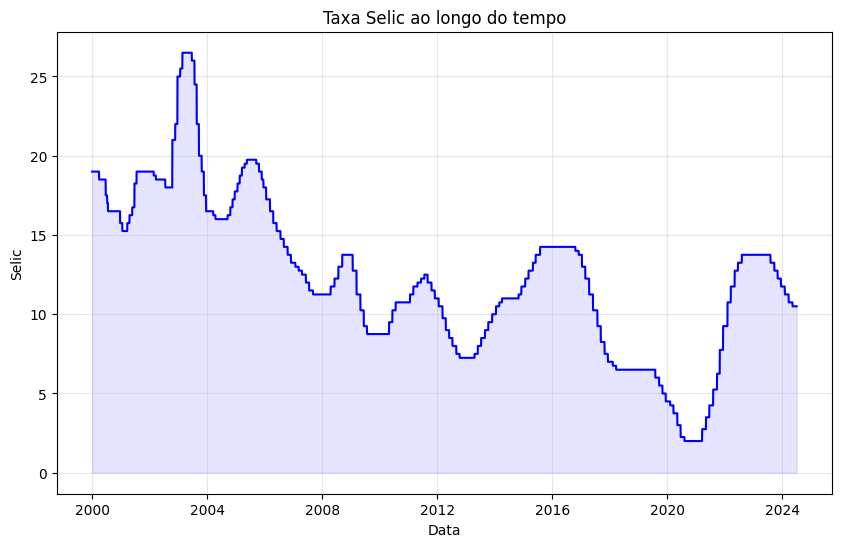

In [98]:
#visualizar isso em um gráfico de dispersão com o seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Selic', data=selic, color ='blue')
#preencher o gráfico com cor
plt.fill_between(selic['Date'], selic['Selic'], color='blue', alpha=0.1)
plt.title('Taxa Selic ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Selic')
plt.grid(True, alpha = 0.3)
plt.show()

## Vou acrescentar a coluna variação da selic

In [96]:
#vou calcular a variação
selic['Variação'] = selic['Selic'].pct_change()

In [99]:
print(selic)

           Date  Selic  Variação
0    2000-01-01   19.0       NaN
1    2000-01-02   19.0       0.0
2    2000-01-03   19.0       0.0
3    2000-01-04   19.0       0.0
4    2000-01-05   19.0       0.0
...         ...    ...       ...
8944 2024-06-27   10.5       0.0
8945 2024-06-28   10.5       0.0
8946 2024-06-29   10.5       0.0
8947 2024-06-30   10.5       0.0
8948 2024-07-01   10.5       0.0

[8949 rows x 3 columns]


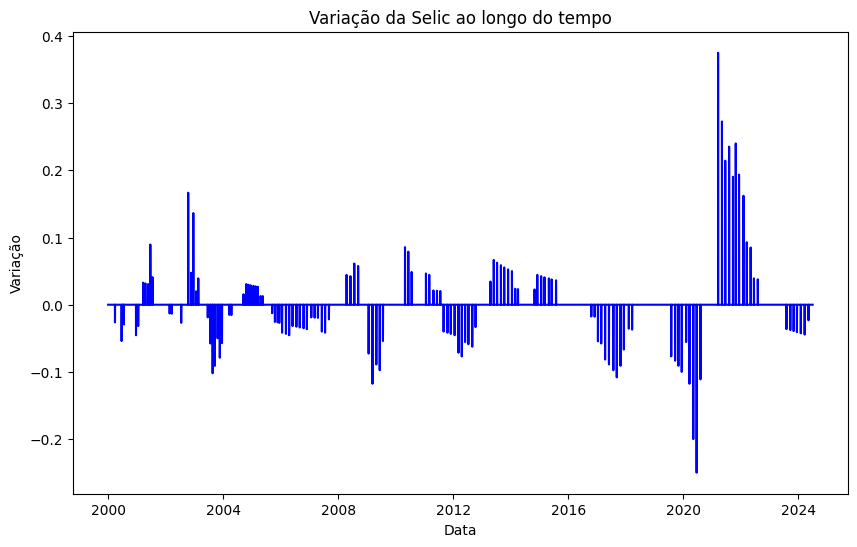

In [100]:
#visualizar a Variação da Selic ao longo do tempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Variação', data=selic, color ='blue')
plt.title('Variação da Selic ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Variação')
plt.show()



---



## Vou buscar os dados da inflação brasielira no período

In [11]:
import gspread

In [12]:
url = "https://docs.google.com/spreadsheets/d/1lKoL4yJhY6IkqCL2qkzKQ5dE8py-GTN9/export?format=csv"
dados = pd.read_csv(url)

In [13]:
#colocar a coluna Date como datetime
dados['Date'] = pd.to_datetime(dados['Date'])
#vou apgar o localizado na linha 0
dados.drop(dados.index[0], inplace=True)
print(dados)

          Date  acumul.  variaç.
1   1994-02-01  3035.71    40.27
2   1994-03-01  3417.39    42.75
3   1994-04-01  3828.49    42.68
4   1994-05-01  4331.19    44.03
5   1994-06-01  4922.60    47.43
..         ...      ...      ...
361 2024-02-01     4.50     0.83
362 2024-03-01     3.93     0.16
363 2024-04-01     3.69     0.38
364 2024-05-01     3.93     0.46
365 2024-06-01     4.23     0.21

[365 rows x 3 columns]


In [14]:
# Filtrar os dados a partir de janeiro de 2000
dados_filtrados = dados[dados['Date'] >= '2000-01-01']
print(dados_filtrados)

          Date  acumul.  variaç.
72  2000-01-01     8.85     0.62
73  2000-02-01     7.86     0.13
74  2000-03-01     6.92     0.22
75  2000-04-01     6.77     0.42
76  2000-05-01     6.47     0.01
..         ...      ...      ...
361 2024-02-01     4.50     0.83
362 2024-03-01     3.93     0.16
363 2024-04-01     3.69     0.38
364 2024-05-01     3.93     0.46
365 2024-06-01     4.23     0.21

[294 rows x 3 columns]


## Visualizar os dados de inflação no período


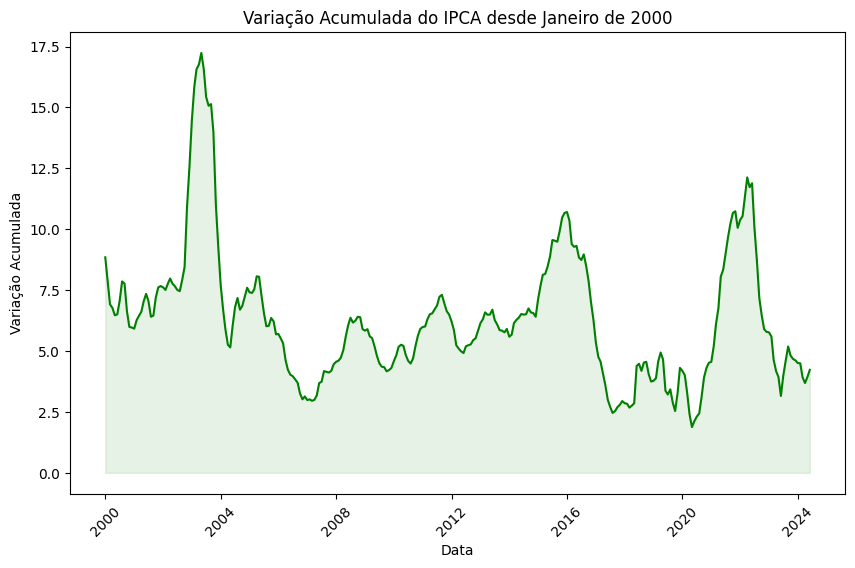

In [15]:
# Visualizar os dados com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_filtrados, x='Date', y='acumul.', color = 'green')
#vou preencher o gráfico
plt.fill_between(dados_filtrados['Date'], dados_filtrados['acumul.'], color='green', alpha=0.1)

plt.title('Variação Acumulada do IPCA desde Janeiro de 2000')
plt.xlabel('Data')
plt.ylabel('Variação Acumulada')
plt.xticks(rotation=45)
plt.show()

## Visualizar os gráficos da Selic vs. Inflação

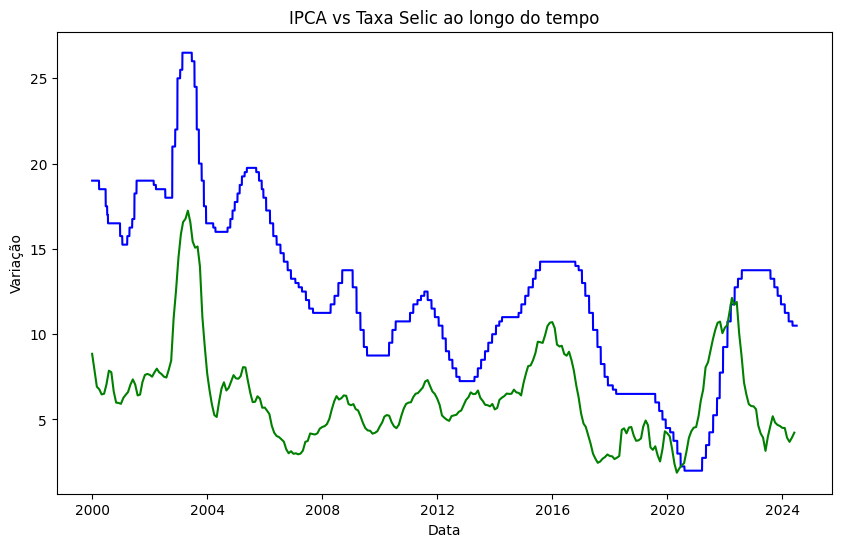

In [16]:
#visualizar o gráfico de inflação vs. selic ao longo do tempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='Data', y='Selic', data=selic, color ='blue')
sns.lineplot(x='Date', y='acumul.', data=dados_filtrados, color ='green')
plt.title('IPCA vs Taxa Selic ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Variação')
plt.show()


## Visualizar os dados da variação da inflação ao longo do tempo

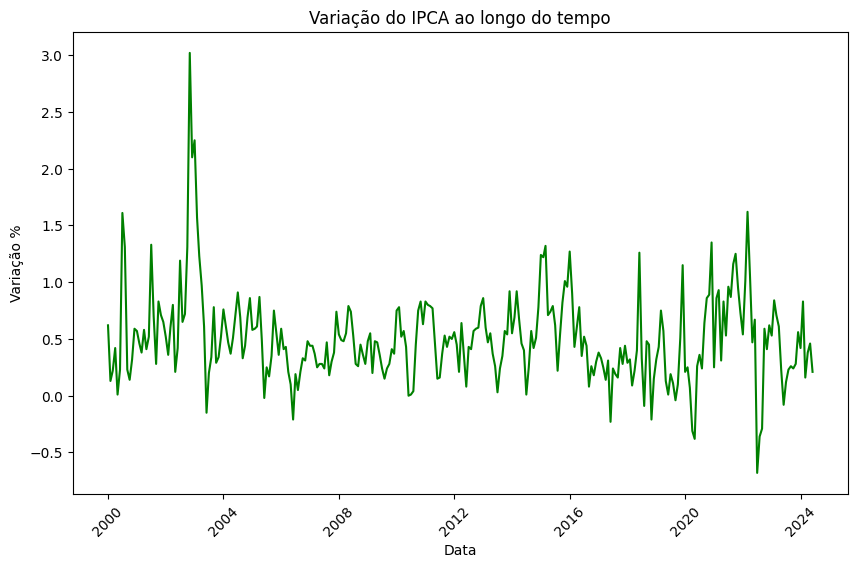

In [18]:
# Visualizar os dados com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_filtrados, x='Date', y='variaç.', color = 'green')

plt.title('Variação do IPCA ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Variação %')
plt.xticks(rotation=45)
plt.show()

## Colocar as duas variações no mesmo gráfico

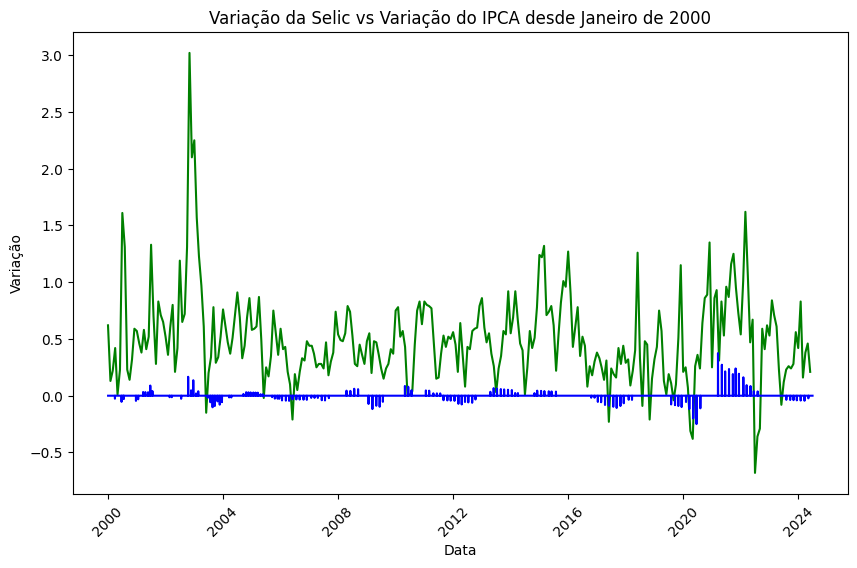

In [19]:
#vou visualizar o gráfico da variação da selic com a variação da inflação
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_filtrados, x='Date', y='variaç.', color = 'green')
sns.lineplot(data=selic, x='Data', y='Variação', color = 'blue')
plt.title('Variação da Selic vs Variação do IPCA desde Janeiro de 2000')
plt.xlabel('Data')
plt.ylabel('Variação')
plt.xticks(rotation=45)
plt.show()

In [69]:
dados_filtrados

,Date,acumul.,variaç.
72,2000-01-01,8.85,0.62
73,2000-02-01,7.86,0.13
74,2000-03-01,6.92,0.22
75,2000-04-01,6.77,0.42
76,2000-05-01,6.47,0.01
...,...,...,...
361,2024-02-01,4.50,0.83
362,2024-03-01,3.93,0.16
363,2024-04-01,3.69,0.38
364,2024-05-01,3.93,0.46




---



## Analisar a correlação linear entre as duas variáveis

In [77]:
#correlação entre a taxa selic e variação do ipca
corr0 = selic['Selic'].corr(dados_filtrados['variaç.'])
print("Coeficiente de correlação:", corr0)

#correlação entre a variação da selic e variação do ipca
corr1 = selic['Variação'].corr(dados_filtrados['variaç.'])
print("Coeficiente de correlação:", corr1)

Coeficiente de correlação: 0.09236804785588613
Coeficiente de correlação: -0.006911176132432383


## Vou avaliar a correlação ao longo do tempo entre os dois

In [80]:
# Função para calcular correlações com lags
def calcular_correlacoes_lags(selic_variacao, ipca_variacao, max_lag):
    lags = []
    corr_values = []

    for lag in range(max_lag + 1):
        lagged_selic = selic_variacao.shift(lag)
        corr = lagged_selic.corr(ipca_variacao)
        lags.append(lag)
        corr_values.append(corr)

    return lags, corr_values

In [81]:
# Calcular correlações para até 24 meses de atraso
max_lag = 24
lags, corr_values = calcular_correlacoes_lags(selic['Variação'], dados_filtrados['variaç.'], max_lag)

In [82]:
# Calcular correlações para até 12 meses de atraso
max_lag = 24
lags, corr_values = calcular_correlacoes_lags(selic['Variação'], dados_filtrados['variaç.'], max_lag)

# Criar um DataFrame para visualizar os resultados
lag_corr_df = pd.DataFrame({'Lag (meses)': lags, 'Correlação': corr_values})

print(lag_corr_df)

    Lag (meses)  Correlação
0             0   -0.006911
1             1   -0.032396
2             2   -0.039352
3             3    0.012117
4             4    0.010150
5             5   -0.014163
6             6   -0.010261
7             7    0.067227
8             8    0.051978
9             9    0.025712
10           10    0.041624
11           11   -0.033767
12           12    0.016458
13           13    0.000324
14           14   -0.024728
15           15    0.011021
16           16    0.005129
17           17    0.000947
18           18   -0.111869
19           19   -0.042141
20           20   -0.087349
21           21   -0.084489
22           22   -0.030760
23           23   -0.037135
24           24   -0.002549


## Vou visualizar esse dado da correlação lag

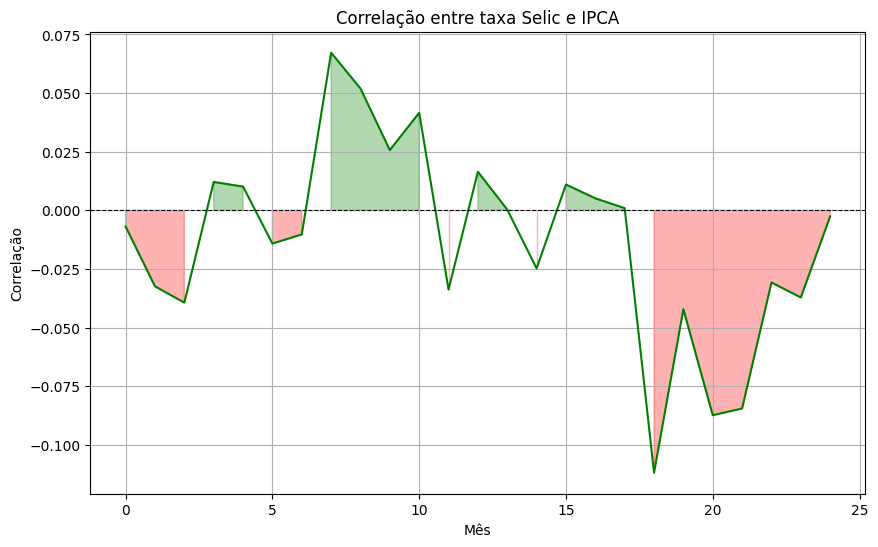

In [83]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=lag_corr_df, x='Lag (meses)', y='Correlação', color='green')

# Preencher áreas positivas e negativas com cores diferentes
plt.fill_between(lag_corr_df['Lag (meses)'], lag_corr_df['Correlação'], where=(lag_corr_df['Correlação'] >= 0), color='green', alpha=0.3)
plt.fill_between(lag_corr_df['Lag (meses)'], lag_corr_df['Correlação'], where=(lag_corr_df['Correlação'] < 0), color='red', alpha=0.3)

# Adicionar linha no y=0
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Adicionar títulos e labels
plt.title('Correlação entre taxa Selic e IPCA')
plt.xlabel('Mês')
plt.ylabel('Correlação')
plt.grid(True)

# Exibir o gráfico
plt.show()

## Veja o que acontece no Brasil:
## - Um aumento da taxa de juros básica na maior parte dos próximos períodos gera uma queda na inflação. Mas essa queda não é perfeita e muito menos contínua no caso brasileiro.

## - Resumo do que ocorre: Ela responde de imediato, mas depois para e, então, apenas após vários meses ela volta a responder e continua respondendo à variação da Selic. Dessa forma, um aumento na Selic hoje deve fazer a inflação desacelerar nos próximos dois ou três períodos, mas após isso o seu efeito fica inconstante e só tende a voltar após o 10° mês! O pico de queda da inflação após um aumento da Selic, nesse caso, ocorreu apenas no 18° mês após a queda.

## Lembre-se: correlação não implica causalidade. Mas sabe-se que a inflação tende a responder negativamente a direção de variação da taxa básica de juros.

## Mais a frente, vou realizar uma análise do caso estadunidense, para mostrar que lá ocorre um padrão mais previsível dado a teoria econômica. Ou seja, um aumento dos juros gera tendência de queda do índice de inflação em uma economia.

## Vou dividir os dados e ver se a situação de má transmissão da política monetária vem diminuindo no Brasil

In [101]:
#vou usar o merged para combinar os dataframes selic com o dados_filtrados a partir da coluna de datas (Date)
merged_df = pd.merge(selic, dados_filtrados, on='Date')

In [102]:
print(merged_df)

          Date  Selic  Variação  acumul.  variaç.
0   2000-01-01  19.00       NaN     8.85     0.62
1   2000-02-01  19.00  0.000000     7.86     0.13
2   2000-03-01  19.00  0.000000     6.92     0.22
3   2000-04-01  18.50  0.000000     6.77     0.42
4   2000-05-01  18.50  0.000000     6.47     0.01
..         ...    ...       ...      ...      ...
289 2024-02-01  11.25 -0.042553     4.50     0.83
290 2024-03-01  11.25  0.000000     3.93     0.16
291 2024-04-01  10.75  0.000000     3.69     0.38
292 2024-05-01  10.75  0.000000     3.93     0.46
293 2024-06-01  10.50  0.000000     4.23     0.21

[294 rows x 5 columns]


In [103]:
#tipo de dados do df_merged
merged_df.dtypes

Date        datetime64[ns]
Selic              float64
Variação           float64
acumul.            float64
variaç.            float64
dtype: object

In [105]:
print(merged_df['Date'])

0     2000-01-01
1     2000-02-01
2     2000-03-01
3     2000-04-01
4     2000-05-01
         ...    
289   2024-02-01
290   2024-03-01
291   2024-04-01
292   2024-05-01
293   2024-06-01
Name: Date, Length: 294, dtype: datetime64[ns]


In [106]:
# Crie os DataFrames filtrados
df_i = merged_df[(merged_df['Date'] >= '2000-01-01') & (merged_df['Date'] <= '2010-12-1')]
df_f = merged_df[(merged_df['Date'] >= '2010-01-01') & (merged_df['Date'] <= '2024-06-1')]

In [109]:
df_i

,Date,Selic,Variação,acumul.,variaç.
0,2000-01-01,19.00,NaN,8.85,0.62
1,2000-02-01,19.00,0.0,7.86,0.13
2,2000-03-01,19.00,0.0,6.92,0.22
3,2000-04-01,18.50,0.0,6.77,0.42
4,2000-05-01,18.50,0.0,6.47,0.01
...,...,...,...,...,...
127,2010-08-01,10.75,0.0,4.49,0.04
128,2010-09-01,10.75,0.0,4.70,0.45
129,2010-10-01,10.75,0.0,5.20,0.75
130,2010-11-01,10.75,0.0,5.63,0.83


In [108]:
df_f

,Date,Selic,Variação,acumul.,variaç.
120,2010-01-01,8.75,0.000000,4.59,0.75
121,2010-02-01,8.75,0.000000,4.83,0.78
122,2010-03-01,8.75,0.000000,5.17,0.52
123,2010-04-01,8.75,0.000000,5.26,0.57
124,2010-05-01,9.50,0.000000,5.22,0.43
...,...,...,...,...,...
289,2024-02-01,11.25,-0.042553,4.50,0.83
290,2024-03-01,11.25,0.000000,3.93,0.16
291,2024-04-01,10.75,0.000000,3.69,0.38
292,2024-05-01,10.75,0.000000,3.93,0.46


## Vou calcular a correlação existente entre 2000 e 2010:

In [115]:
# Função para calcular correlações com lags
def calcular_correlacoes_lags(selic_variacao, ipca_variacao, max_lag):
    lags = []
    corr_values = []

    for lag in range(max_lag + 1):
        lagged_selic = selic_variacao.shift(lag)
        combined_data = pd.concat([lagged_selic, ipca_variacao], axis=1).dropna()
        corr = combined_data.iloc[:, 0].corr(combined_data.iloc[:, 1])
        lags.append(lag)
        corr_values.append(corr)

    return lags, corr_values

In [116]:
# Ajustar as colunas para as variáveis de interesse
selic_variacao = df_i['Variação']
ipca_variacao = df_i['variaç.']

# Calcular correlações para o período completo
max_lag = 24
lags, corr_values = calcular_correlacoes_lags(selic_variacao, ipca_variacao, max_lag)

# Criar DataFrame para visualizar os resultados
lag_corr_df = pd.DataFrame({'Lag (meses)': lags, 'Correlação': corr_values})

print("Correlação com lag:")
print(lag_corr_df)

Correlação com lag:
    Lag (meses)  Correlação
0             0    0.151056
1             1    0.070405
2             2    0.099741
3             3    0.067163
4             4    0.043674
5             5    0.048410
6             6    0.011812
7             7    0.019224
8             8    0.019788
9             9    0.035672
10           10    0.062043
11           11    0.055466
12           12    0.055409
13           13    0.064210
14           14    0.014761
15           15    0.077453
16           16    0.051742
17           17    0.034457
18           18   -0.045691
19           19   -0.002062
20           20    0.009447
21           21    0.011079
22           22   -0.004744
23           23   -0.058048
24           24   -0.046982


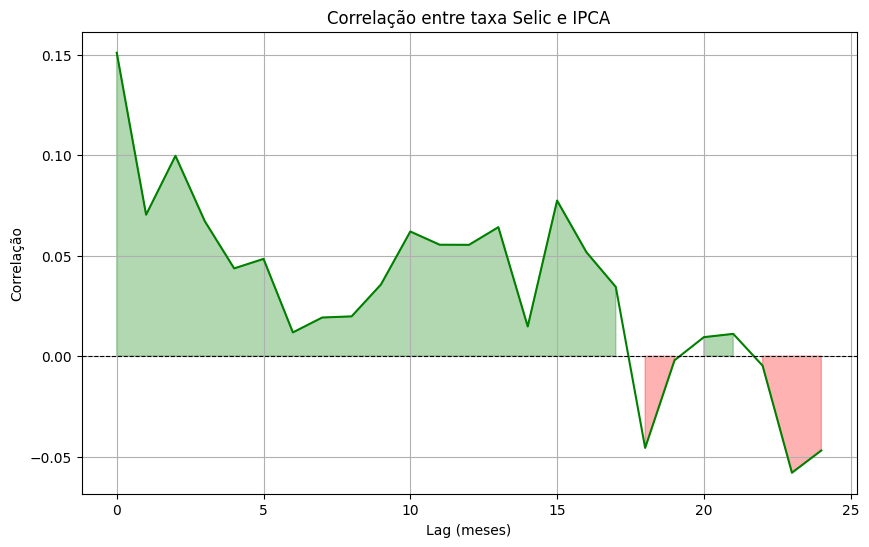

In [117]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=lag_corr_df, x='Lag (meses)', y='Correlação', color='green')

# Preencher áreas positivas e negativas com cores diferentes
plt.fill_between(lag_corr_df['Lag (meses)'], lag_corr_df['Correlação'],
                 where=(lag_corr_df['Correlação'] >= 0), color='green', alpha=0.3)
plt.fill_between(lag_corr_df['Lag (meses)'], lag_corr_df['Correlação'],
                 where=(lag_corr_df['Correlação'] < 0), color='red', alpha=0.3)

# Adicionar linha no y=0
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Adicionar títulos e labels
plt.title('Correlação entre taxa Selic e IPCA')
plt.xlabel('Lag (meses)')
plt.ylabel('Correlação')
plt.grid(True)

# Exibir o gráfico
plt.show()

## Veja que o efeito não parece adequado para o objetivo da política monetária.
## O efeito de queda da inflação só vem após vários meses -- apenas após o 18° mês! antes disso a correlação foi positiva, ou seja, a política monetária (aumento dos juros, do exemplo) não conseguiu levar a inflação a cair nos meses seguintes a aplicação dessa política. Apenas no médio-prazo isso ocorreu com alguma força. Sim: a economia é deficiente para absorver os efeitos da política monetária.

## Vou ver se os resultados melhoram entre 2010 e 2024:

In [119]:
# Ajustar as colunas para as variáveis de interesse
selic_variacao = df_f['Variação']
ipca_variacao = df_f['variaç.']

# Calcular correlações para o período completo
max_lag = 24
lags, corr_values = calcular_correlacoes_lags(selic_variacao, ipca_variacao, max_lag)

# Criar DataFrame para visualizar os resultados
lag_corr_df = pd.DataFrame({'Lag (meses)': lags, 'Correlação': corr_values})

print("Correlação com lag:")
print(lag_corr_df)

Correlação com lag:
    Lag (meses)  Correlação
0             0    0.117395
1             1    0.114168
2             2    0.092804
3             3    0.062757
4             4   -0.060917
5             5    0.075381
6             6    0.099683
7             7    0.079376
8             8    0.145044
9             9    0.194835
10           10    0.063900
11           11    0.029196
12           12   -0.109426
13           13   -0.027682
14           14    0.021855
15           15   -0.062509
16           16   -0.131544
17           17    0.129294
18           18   -0.008726
19           19   -0.003028
20           20    0.069314
21           21   -0.061729
22           22    0.003436
23           23    0.021085
24           24    0.004841


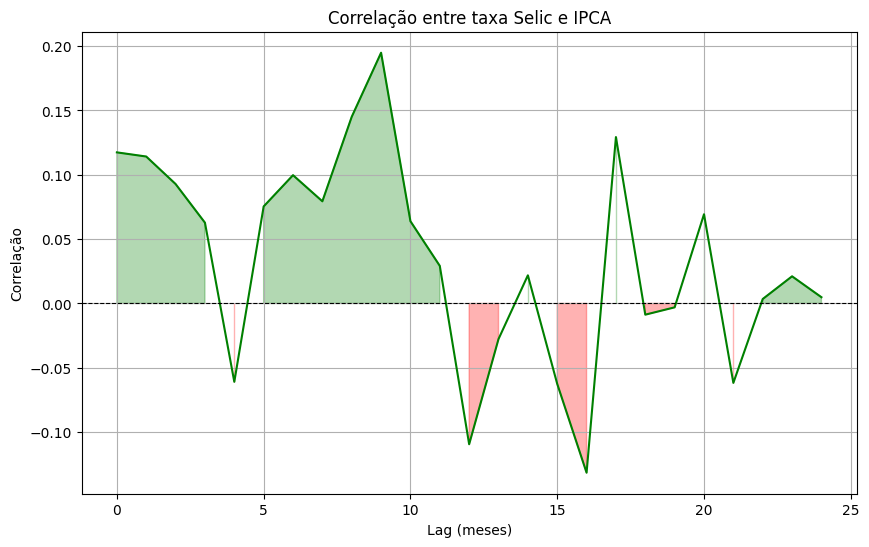

In [120]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=lag_corr_df, x='Lag (meses)', y='Correlação', color='green')

# Preencher áreas positivas e negativas com cores diferentes
plt.fill_between(lag_corr_df['Lag (meses)'], lag_corr_df['Correlação'],
                 where=(lag_corr_df['Correlação'] >= 0), color='green', alpha=0.3)
plt.fill_between(lag_corr_df['Lag (meses)'], lag_corr_df['Correlação'],
                 where=(lag_corr_df['Correlação'] < 0), color='red', alpha=0.3)

# Adicionar linha no y=0
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Adicionar títulos e labels
plt.title('Correlação entre taxa Selic e IPCA')
plt.xlabel('Lag (meses)')
plt.ylabel('Correlação')
plt.grid(True)

# Exibir o gráfico
plt.show()

## As maiores quedas, dado a implementação de aumentos da taxa de juros básica, foi depois do 10° mês da aplicação. Não há o que acrescentar: a política monetária no Brasil tem dificuldade de ser transmitida ao longo da economia. No contexto nacional.

## Perceba: isso não nega a eficácia da política monetária brasileira. O por que disso tem haver com os resultados obtidos pela política do Tripé Macroeconômico, que é mal-implementada no Brasil. Mesmo sendo implementada em parte no Brasil, já que um desses "pés" da política não é bem aplicado, -- a responsabilidade fiscal -- mas continua obtendo bons resultados, dado a queda estrutural da inflação do país ao longo do tempo.



---



#Por agora:
## Vou realizar uma análise estatística ARIMA de forma a ver se consigo explicar os resultados da inflação brasileira a partir dos dados da selic ao longo do tempo

In [51]:
# Combinar as séries de interesse
data_combined = pd.DataFrame({
    'Selic_Variacao': selic['Variação'],
    'IPCA_Variacao': dados_filtrados['variaç.']
})
# Remover valores ausentes
data_combined.dropna(inplace=True)

In [52]:
#ajustar o modelo ARIMA com os dados transformados
model = sm.tsa.ARIMA(data_combined['IPCA_Variacao'], order=(1, 1, 1))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [53]:
# Resumo do modelo
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:          IPCA_Variacao   No. Observations:                  294
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -76.163
Date:                Tue, 16 Jul 2024   AIC                            158.326
Time:                        13:34:38   BIC                            169.367
Sample:                             0   HQIC                           162.748
                                - 294                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6246      0.042     14.888      0.000       0.542       0.707
ma.L1         -0.9969      0.028    -35.743      0.000      -1.052      -0.942
sigma2         0.0973      0.005     20.766      0.0

# Entendendo os resultados do ARIMA:
## Os dados indicam que não, não se pode explicar bem a inflação pela selic. A modelagem tem alguns problemas os quais eu não pretendo trabalhar muito aqui.
## A ideia é apenas ver se ocorre uma relação de explicação minimamente forte da Selic explicando o IPCA. O que não parece ocorrer.



---



# Agora sim vou comparar os resultados brasileiros com o dos EUA

## Carregar os dados da inflação nos EUA:

In [56]:
# URL do arquivo CSV
url1 = "https://docs.google.com/spreadsheets/d/1qV5kNoL0RRmG6vpedDVTA4N0FkSysh3rqCu9RkjT7dk/export?format=csv"
# Carregando o CSV em um DataFrame
dados1 = pd.read_csv(url1)

In [57]:
# Vou colocar a coluna data em datetime
dados1['data'] = pd.to_datetime(dados1['data'], dayfirst=True)
print(dados1)

          data  inflation
0   2001-01-01        3.7
1   2001-02-01        3.5
2   2001-03-01        2.9
3   2001-04-01        3.3
4   2001-05-01        3.6
..         ...        ...
277 2024-02-01        3.2
278 2024-03-01        3.5
279 2024-04-01        3.4
280 2024-05-01        3.3
281 2024-06-01        3.0

[282 rows x 2 columns]


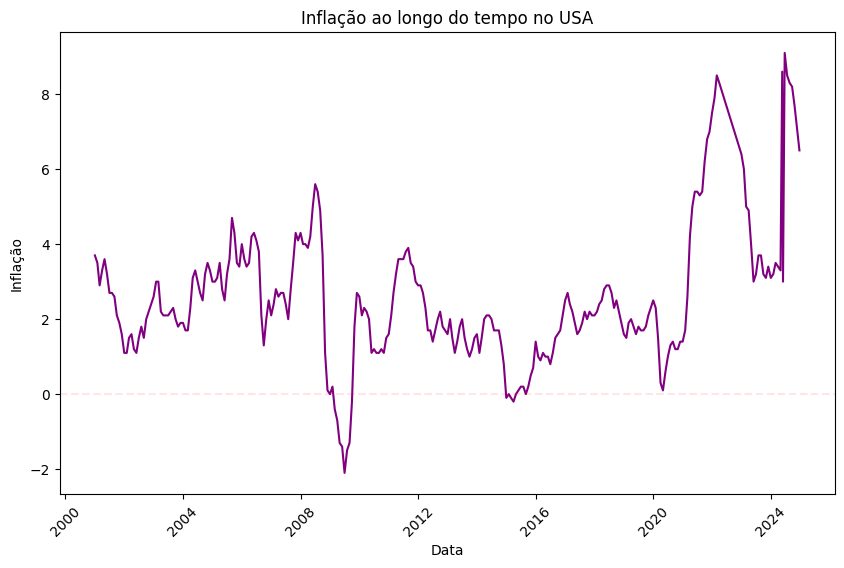

In [58]:
#vou colocar o gráfico da inflation vs. data
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados1, x='data', y='inflation', color = 'purple')
#vou colocar uma linha costante no horizontal em y 0
plt.axhline(y=0, color='red', alpha = 0.1, linestyle='--')
plt.title('Inflação ao longo do tempo no USA')
plt.xlabel('Data')
plt.ylabel('Inflação')
plt.xticks(rotation=45)
plt.show()

In [33]:
#vou calcular a variação da inflação
dados1['Variação'] = dados1['inflation'].pct_change()

## Veja a variação da inflação ao longo do tempo lá:

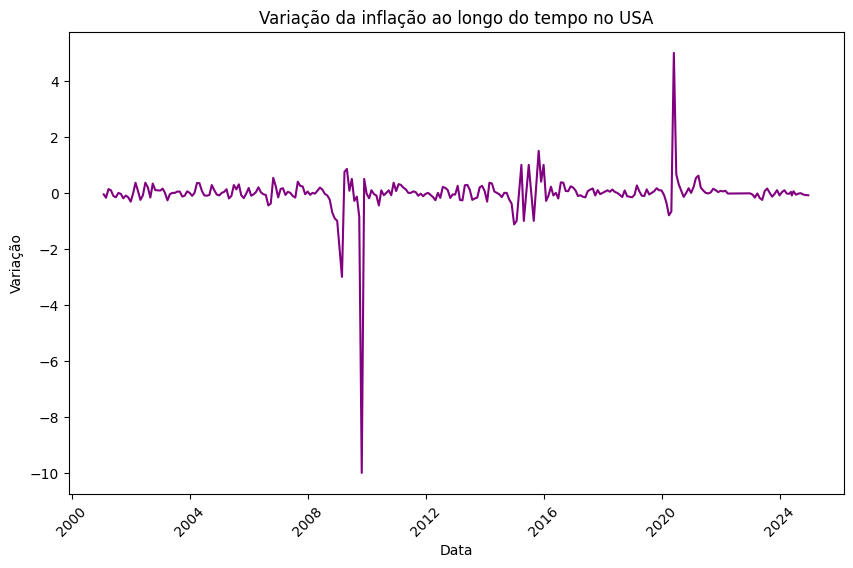

In [34]:
#vou visualizar a variação da inflação ao longo do tempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados1, x='data', y='Variação', color = 'purple')
plt.title('Variação da inflação ao longo do tempo no USA')
plt.xlabel('Data')
plt.ylabel('Variação')
plt.xticks(rotation=45)
plt.show()

## Vou carregar os dados relativos às taxas de juros básicas estadunidense ao longo do tempo

In [59]:
url2 = "https://docs.google.com/spreadsheets/d/12gSZyTBOehCV0sSJqiY53usFM_gPylVfuGAtkrYPl1A/export?format=csv"
dados2 = pd.read_csv(url2)

In [60]:
print(dados2)

           data  taxa  taxa1
0    2000-01-01  5,45   5.45
1    2000-02-01  5,73   5.73
2    2000-03-01  5,85   5.85
3    2000-04-01  6,02   6.02
4    2000-05-01  6,27   6.27
..          ...   ...    ...
289  2024-02-01  5,33   5.33
290  2024-03-01  5,33   5.33
291  2024-04-01  5,33   5.33
292  2024-05-01  5,33   5.33
293  2024-06-01  5,33   5.33

[294 rows x 3 columns]


In [61]:
#vou colocar a coluna data como datetime
dados2['data'] = pd.to_datetime(dados2['data'])

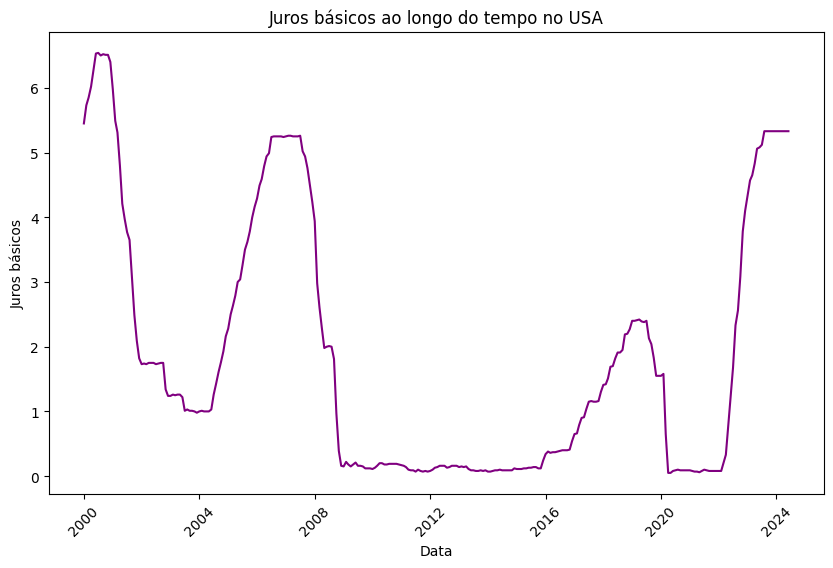

In [62]:
#vou visualizar a coluna taxa1 e data
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados2, x='data', y='taxa1', color = 'purple')
plt.title('Juros básicos ao longo do tempo no USA')
plt.xlabel('Data')
plt.ylabel('Juros básicos')
plt.xticks(rotation=45)
plt.show()

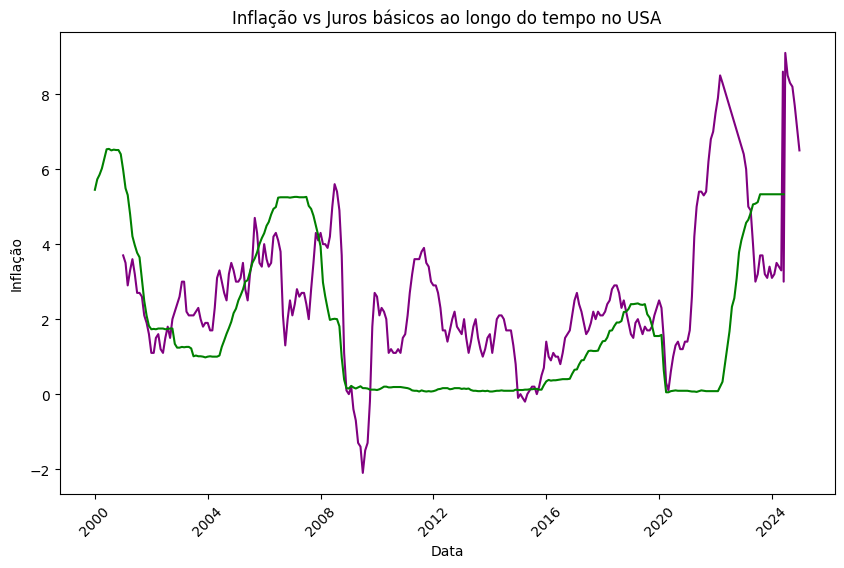

In [63]:
#vou colocar a inflation vs. taxa básica de juros em um gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados1, x='data', y='inflation', color = 'purple')
sns.lineplot(data=dados2, x='data', y='taxa1', color = 'green')
plt.title('Inflação vs Juros básicos ao longo do tempo no USA')
plt.xlabel('Data')
plt.ylabel('Inflação')
plt.xticks(rotation=45)
plt.show()


In [64]:
#vou estudar a correlação entre taxa1 e inflation
corr2 = dados2['taxa1'].corr(dados1['inflation'])
print("Coeficiente de correlação:", corr2)

Coeficiente de correlação: 0.012958873008054657


## Correlação baixa

## Vou calcular a correlação com defasagem (o efeito de uma aumento na taxa de juros só é sentido mais a frente, com defasagem)

In [65]:
#vou criar um dataframe combinando data, inflation e taxa1
data_combined2 = pd.DataFrame({
    'Inflation': dados1['inflation'],
    'Taxa1': dados2['taxa1']
})

In [ ]:
#vou apagar os valores nan
data_combined2.dropna(inplace=True)

In [43]:
# Ajustar o modelo ARIMA (p, d, q)
model1 = sm.tsa.ARIMA(data_combined2['Inflation'], order=(1, 1, 1), exog=data_combined2['Taxa1'])
results1 = model1.fit()

# Resumo do modelo
print(results1.summary())

                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  294
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -150.773
Date:                Tue, 16 Jul 2024   AIC                            309.547
Time:                        13:26:25   BIC                            324.267
Sample:                             0   HQIC                           315.442
                                - 294                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Taxa1         -0.2257      0.135     -1.671      0.095      -0.490       0.039
ar.L1          0.1697      0.124      1.363      0.173      -0.074       0.414
ma.L1          0.3162      0.117      2.691      0.0

## Os resultados dessa modelagem ARIMA a partir do qual buscou-se ver o quanto a variável taxa de juros básica explica um pouco mais a variável inflação, mostra que ela explica mais a inflação do que no caso brasileiro.

## É preciso lembrar que a inflação é explicada por diversos fatores, não apenas a taxa de juros básicas de uma economia.

In [66]:
# Função para calcular correlações com lags
def calcular_correlacoes_lags(inflation, taxa1, max_lag):
    lags = []
    corr_values = []

    for lag in range(max_lag + 1):
        lagged_taxa1 = taxa1.shift(lag)
        corr = inflation.corr(lagged_taxa1)
        lags.append(lag)
        corr_values.append(corr)

    return lags, corr_values

In [67]:
# Chamando a função
lags, corr_values = calcular_correlacoes_lags(data_combined2['Inflation'], data_combined2['Taxa1'], max_lag=24)

# Exibindo os resultados
lag_correlation_df0 = pd.DataFrame({'Lag': lags, 'Correlation': corr_values})
print(lag_correlation_df0)

    Lag  Correlation
0     0     0.012959
1     1    -0.013816
2     2    -0.036291
3     3    -0.054872
4     4    -0.075423
5     5    -0.097437
6     6    -0.116028
7     7    -0.129257
8     8    -0.139473
9     9    -0.145407
10   10    -0.145170
11   11    -0.141026
12   12    -0.133291
13   13    -0.121622
14   14    -0.109223
15   15    -0.097311
16   16    -0.085417
17   17    -0.072393
18   18    -0.058609
19   19    -0.046571
20   20    -0.035410
21   21    -0.023412
22   22    -0.013750
23   23    -0.003618
24   24     0.005838


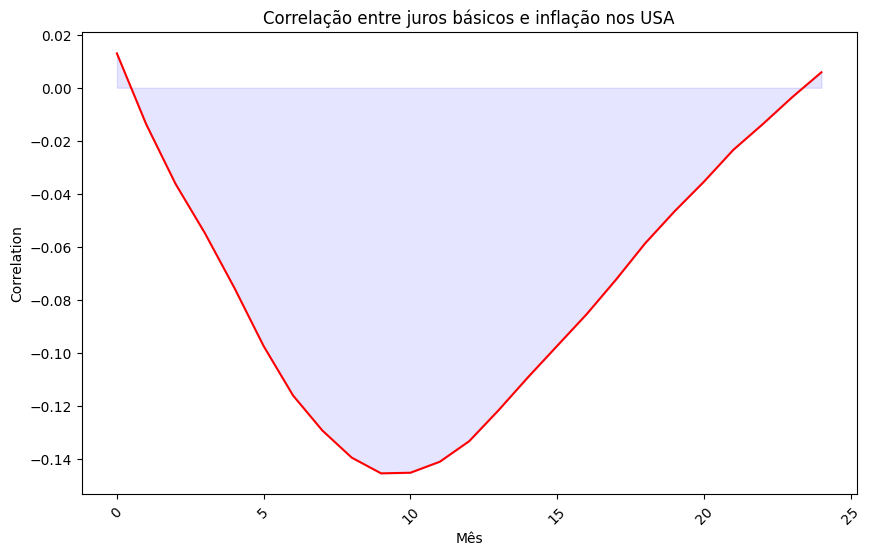

In [68]:
#vou visualizar os dados do dataframe lag_correlatio_df0
plt.figure(figsize=(10, 6))
sns.lineplot(data=lag_correlation_df0, x='Lag', y='Correlation', color = 'red')
#vou preencher
plt.fill_between(lag_correlation_df0['Lag'], lag_correlation_df0['Correlation'], color='blue', alpha=0.1)
plt.title('Correlação entre juros básicos e inflação nos USA')
plt.xlabel('Mês')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

## Nos EUA, um aumento da taxa de juros básica gera uma resposta de tendência permanente da inflação (ela cai e continua caindo a partir do 2° mês chegando ao pico de queda no 10° mês). Após esse tempo o efeito inverso na inflação tende a ser menor, mas ainda não cessa. Tal efeito parece cessarapenas após 24 mês (2 anos) do aumento dos juros.

# **Conclusão:**
## Deve-se investigar as causas dessa deficiência de transmissão da política monetária na economima brasileira e resolver o problema, de modo que o país consiga após isso usufruir dos efeitos da política monetária em sua plenitude. Isso implicará em melhora do funcionamento da economia nacional.

#**END.**